In [5]:
# Imports
import os
import csv

import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Traffic count limit for traffic density
count_limit = 150
# Traffic speed limit for traffic density
speed_limit = 50

# Traffic data of a location
class TrafficData:
    """
    A class to represent the traffic data of a location.

        Attributes:
            time (list[datetime]): Timestamps of the traffic data
            hour (list[int]): Hours for each timestamp
            weekday (list[int]): Weekdays for each timestamp (0..6)
            week_number (list[int]): Week numbers for each timestamp
            count (list[int]): Number of vehicles for each timestamp
            speed (list[float]): Average traffic speed for each timestamp
            speed_sum (list[int]): Traffic speed sum for each timestamp
            density (list[float]): Traffic density for each timestamp
        
        Methods:
            add_data(self, time, speed): Adds data to the traffic data
    """

    # Last added timestamp
    last_time = 0

    # Traffic data
    time = []
    hour = []
    weekday = []
    week_number = []

    count = []
    speed = []
    speed_sum = []
    density = []

    # Adds data to the traffic data
    def add_data(self, time, speed):
        """
        Adds data to the traffic data.

            Parameters:
                time (datetime): Timestamp to add to the traffic data
                speed (int): Traffic speed to add for the timestamp
        """

        # Add data to existing timestamp
        if(time in self.time):
            index = self.time.index(time)
            self.count[index] = self.count[index] + 1
            self.speed_sum[index] = self.speed_sum[index] + speed
        # Add data to new timestamp
        else:
            self.time.append(time)
            self.hour.append(time.hour)
            self.weekday.append(time.weekday())
            self.week_number.append(time.isocalendar()[1])
            self.count.append(1)
            self.speed_sum.append(speed)

            index = 0
            if self.last_time in self.time:
                index = self.time.index(self.last_time)

            count = self.count[index]
            speed = self.speed_sum[index] / count
            speed_param = limit(speed_limit - speed, 0, speed_limit)
            density = (map(count, 0, count_limit, 0, 9) + map(speed_param, 0, speed_limit, 0, 9)) / 2

            self.speed.append(speed)
            self.density.append(density)
            self.last_time = time

In [6]:
# Limits a value in an interval
def limit(value, min, max):
    """
    Limits a value in an interval.

        Parameters:
            value: Value to limit in the interval
            min: Minimum value the given value should have
            max: Maximum value the given value should have

        Returns:
            The given value limited in the interval
    """

    if value < min:
        return min
    elif value > max:
        return max
    else:
        return value

# Maps a value from one range to another
def map(value, min_in, max_in, min_out, max_out):
    """
    Maps a value from one range to another.

        Parameters:
            value: Value to map to the new range
            min_in: Minimum value of the input range
            max_in: Maximum value of the input range
            min_out: Minimum value of the output range
            max_out: Maximum value of the output range

        Returns:
            The given value mapped to the new range
    """

    scale = float(value - min_in) / float(max_in - min_in)
    scale = limit(scale, 0, 1)

    return (scale * float(max_out - min_out)) + min_out

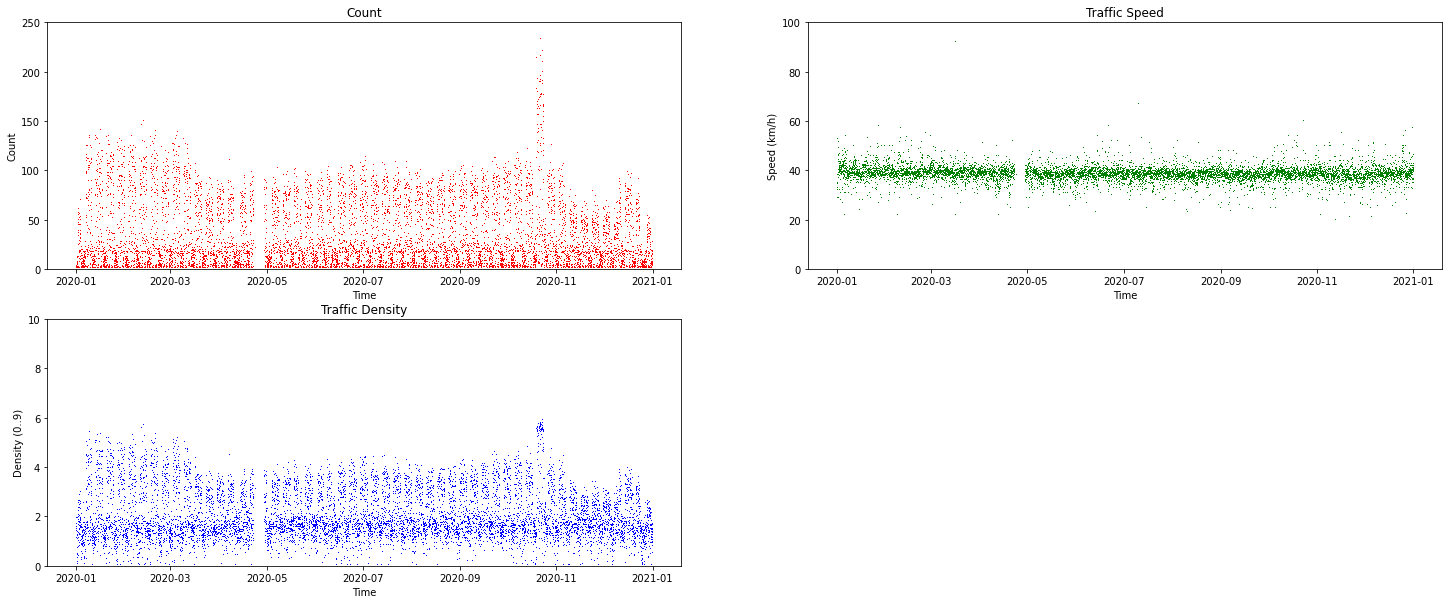

In [7]:
# CSV folder of traffic data
folder = "210226_Daten_Hackathon/210226_Daten_Verkehr_Hackathon/"

# CSV files with traffic data
files = os.listdir(folder)

# Traffic data for each street direction
traffic_data = {}

# Read all CSV files
for file in files:

    # Open the CSV file
    with open(folder + file) as csv_file:
        # Read the CSV file with delimiter ";"
        csv_reader = csv.reader(csv_file, delimiter = ";")
        i = 0

        # Iterate through CSV rows
        for row in csv_reader:
            # Skip first line
            if i < 1:
                i = i + 1
                continue

            # Get parameters
            direction = row[2]
            speed = int(row[3])
            time = datetime.datetime.strptime(row[4][:-3], "%d.%m.%Y %H")

            # Get current traffic instance
            if (direction in traffic_data) == False:
                traffic_data[direction] = TrafficData()

            current = traffic_data[direction]

            # Add traffic data
            current.add_data(time, speed)


data = traffic_data["Richtung A nach B"]

# Plot vehicle count
fig = plt.figure(figsize = (25, 10))
sub1 = fig.add_subplot(221)
sub1.set_title("Count")
sub1.set_xlabel("Time")
sub1.set_ylabel("Count")
sub1.set_ylim(0, 250)
sub1.plot(data.time, data.count, c = "red", marker = ",", ls = "None")

# Plot traffic speed
sub2 = fig.add_subplot(222)
sub2.set_title("Traffic Speed")
sub2.set_xlabel("Time")
sub2.set_ylabel("Speed (km/h)")
sub2.set_ylim(0, 100)
sub2.plot(data.time, data.speed, c = "green", marker = ",", ls = "None")

# Plot traffic density
sub3 = fig.add_subplot(223)
sub3.set_title("Traffic Density")
sub3.set_xlabel("Time")
sub3.set_ylabel("Density (0..9)")
sub3.set_ylim(0, 10)
sub3.plot(data.time, data.density, c = "blue", marker = ",", ls = "None")

plt.show()